In [1]:
import sqlite3
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db = sqlite3.connect('sv.db')

In [4]:
facility = pd.read_sql_query('SELECT * FROM facility', db)
transfer = pd.read_sql_query('SELECT * FROM transfer', db)

In [5]:
facility.head()

,code,name,type,region,address,suburb,state,postcode,latitude,longitude,active
0,F18,Suez Environmental (formerly SITA),Landfill,Metropolitan WRRG,274 Hallam Rd,Hampton Park,VIC,,-38.054000,145.267161,1
1,F19,Maddingley Brown Coal (ES90),Landfill,Grampians Central West WRRG,11 Tilleys Rd,Maddingley,VIC,3340,-37.697019,144.446879,1
2,F20,Altona North Landfill (ES 26227),Landfill,Metropolitan WRRG,55 McArthurs Rd,Altona North,VIC,3018,-37.840275,144.837288,1
3,F21,Boral Landfill (ES 37288),Landfill,Metropolitan WRRG,1100-1152 Christies Rd,Ravenhall,VIC,3030,-37.767976,144.738389,1
4,F22,BTQ Group Sunbury (ES21321),Landfill,Metropolitan WRRG,500 Sunbury Rd,Bulla,VIC,3428,-37.622560,144.789740,1


In [6]:
transfer.head()

,trno,in_facility,datetimein,weightnett,item_group,item_name,inout,quantity,volume,density,kg_per_item,tot_tonnes,out_facility
0,1,Venus Bay Transfer Station,2017-09-01 09:55:37,0.0,Domestic Waste,01) Bag (<120L),IN,1,0.075,0.13,,0.00975,
1,2,Venus Bay Transfer Station,2017-09-01 11:44:17,0.0,Domestic Waste,01) Bag (<120L),IN,1,0.075,0.13,,0.00975,
2,3,Venus Bay Transfer Station,2017-09-02 09:44:01,0.0,Domestic Waste,01) Bag (<120L),IN,1,0.075,0.13,,0.00975,
3,4,Venus Bay Transfer Station,2017-09-02 11:15:18,0.0,Domestic Waste,01) Bag (<120L),IN,1,0.075,0.13,,0.00975,
4,5,Venus Bay Transfer Station,2017-09-02 11:27:54,0.0,Domestic Waste,01) Bag (<120L),IN,1,0.075,0.13,,0.00975,


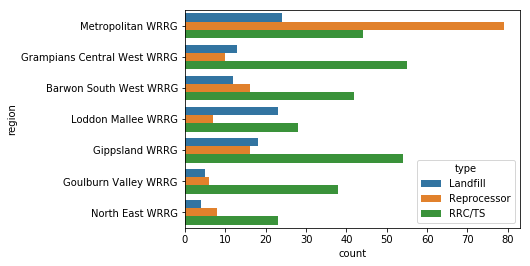

In [18]:
ax = sns.countplot(y='region', hue='type', data=facility)

In [30]:
facility.loc[facility['name'].isin(transfer['out_facility'].unique()), 'type']

20        Landfill
30        Landfill
163    Reprocessor
164    Reprocessor
169    Reprocessor
175    Reprocessor
190    Reprocessor
204    Reprocessor
229    Reprocessor
432         RRC/TS
523         RRC/TS
524         RRC/TS
Name: type, dtype: object

In [45]:
transfer.loc[transfer['inout'] == 'OUT', 'volume'].value_counts()

0.0        250
30.0        89
0.02        28
1.0         20
0.75        10
4.0         10
0.5          8
8.0          8
0.07         8
3.0          8
6.0          8
2.25         6
0.3          6
2.5          6
0.06         6
7.0          6
0.17         6
5.0          6
18.25        4
7.5          4
0.04         4
0.48         4
0.11         4
0.05         4
0.32         4
190.0        4
2.0          4
0.24         4
6.75         4
0.25         4
          ... 
325.79       2
322.5        2
0.47         2
7.88         2
3903.08      2
313.97       2
18.4         2
311.19       2
3.63         2
33.75        2
301.99       2
6.5          2
2684.0       2
298.5        2
809.25       2
295.71       2
4.87         2
5.25         2
88.88        2
289.16       2
2847.5       2
2846.0       2
666.0        2
3.12         2
201.0        2
16.5         2
277.0        2
1.52         2
31.0         2
             2
Name: volume, Length: 286, dtype: int64